### Project 1

Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

### BITCOIN MARKET PRICE PREDICTION

### Import libraries and read train dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
os.getcwd()
os.chdir('C:\\Users\\MY-PC\\Documents\\Python Scripts')

data = pd.read_csv('bitcoin_dataset(1).csv')

In [2]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [3]:
data.shape

(2906, 24)

In [4]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


### Checking for missing values

In [5]:
percentage_missing = (data.isnull().sum()*100)/(len(data))
print(percentage_missing)

Date                                                   0.000000
btc_market_price                                       0.000000
btc_total_bitcoins                                     0.929112
btc_market_cap                                         0.000000
btc_trade_volume                                       0.722643
btc_blocks_size                                        0.997935
btc_avg_block_size                                     0.000000
btc_n_orphaned_blocks                                  0.000000
btc_n_transactions_per_block                           0.000000
btc_median_confirmation_time                           0.412939
btc_hash_rate                                          0.000000
btc_difficulty                                         0.550585
btc_miners_revenue                                     0.000000
btc_transaction_fees                                   0.344116
btc_cost_per_transaction_percent                       0.000000
btc_cost_per_transaction                

In [6]:
print(data[data.isnull().any(axis=1)])

                Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
93    5/21/2010 0:00          0.000000           2842550.0    0.000000e+00   
94    5/22/2010 0:00          0.000000           2852150.0    0.000000e+00   
95    5/23/2010 0:00          0.000000           2862900.0    0.000000e+00   
96    5/24/2010 0:00          0.000000           2872400.0    0.000000e+00   
97    5/25/2010 0:00          0.000000           2883150.0    0.000000e+00   
98    5/26/2010 0:00          0.000000           2893750.0    0.000000e+00   
99    5/27/2010 0:00          0.000000           2903500.0    0.000000e+00   
100   5/28/2010 0:00          0.000000           2914450.0    0.000000e+00   
101   5/29/2010 0:00          0.000000           2924300.0    0.000000e+00   
102   5/30/2010 0:00          0.000000           2931850.0    0.000000e+00   
103   5/31/2010 0:00          0.000000           2939450.0    0.000000e+00   
104    6/1/2010 0:00          0.000000           2946100.0    0.

### Impute the missing values using forward fill option

In [7]:
data = data.fillna(method = 'ffill')
percentage_missing = (data.isnull().sum()*100)/(len(data))
print(percentage_missing)

Date                                                   0.0
btc_market_price                                       0.0
btc_total_bitcoins                                     0.0
btc_market_cap                                         0.0
btc_trade_volume                                       0.0
btc_blocks_size                                        0.0
btc_avg_block_size                                     0.0
btc_n_orphaned_blocks                                  0.0
btc_n_transactions_per_block                           0.0
btc_median_confirmation_time                           0.0
btc_hash_rate                                          0.0
btc_difficulty                                         0.0
btc_miners_revenue                                     0.0
btc_transaction_fees                                   0.0
btc_cost_per_transaction_percent                       0.0
btc_cost_per_transaction                               0.0
btc_n_unique_addresses                                 0

### Ploting the distribution of bitcoin

(array([2649.,   93.,   65.,   23.,   11.,   21.,    6.,   21.,   12.,
           5.]), array([    0.      ,  1949.868333,  3899.736666,  5849.604999,
         7799.473332,  9749.341665, 11699.209998, 13649.078331,
        15598.946664, 17548.814997, 19498.68333 ]), <a list of 10 Patch objects>)

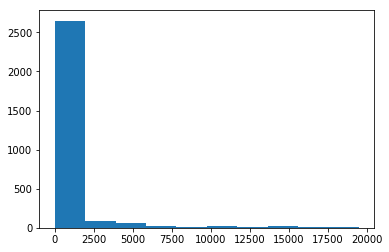

In [8]:
plt.hist(data['btc_market_price'],bins=10)

### Preprocessing of data for modeling

In [9]:
#Defining X and Y variables
x = data.drop(["Date", "btc_market_price"], axis = 1)
y = pd.DataFrame(data["btc_market_price"])

In [10]:
# Randomising data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [11]:
from sklearn.preprocessing import MinMaxScaler
mm_x = MinMaxScaler()
x_train = mm_x.fit_transform(x_train)
x_test = mm_x.fit_transform(x_test)

### Importing libraries for score and GridSearch

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
linReg = regressor.fit(x_train, y_train)

In [14]:
scores = cross_val_score(regressor, x_train, y_train, cv=5, scoring = 'r2')
print("Validation score: {}".format(scores))
print("Mean validation score: {}".format(scores.mean()))

Validation score: [0.99995419 0.99995768 0.99997558 0.99995469 0.99994304]
Mean validation score: 0.9999570372036015


In [15]:
print('R-squared score (training): {:.3f}'
     .format(linReg.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linReg.score(x_test, y_test)))

R-squared score (training): 1.000
R-squared score (test): 0.912


### Lasso regression

In [16]:
#Grid Search of Lasso Regression and obtaining best parameters and scores
from sklearn.linear_model import Lasso
lasso = Lasso()
param_grid = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100],
             'max_iter':[1000,10000]}
grid_search_lasso = GridSearchCV(lasso, param_grid, cv = 5)
grid_search_lasso.fit(x_train, y_train)
print("Best Parameters for lasso: {}".format(grid_search_lasso.best_params_))
print("Best Score for lasso: {:.2f}".format(grid_search_lasso.best_score_))

Best Parameters for lasso: {'alpha': 0.01, 'max_iter': 1000}
Best Score for lasso: 1.00


In [17]:
lasso = Lasso(alpha = 0.01, max_iter= 1000)
lassoReg = lasso.fit(x_train,y_train)

In [18]:
scores = cross_val_score(lasso, x_train, y_train, cv=5, scoring = 'r2')
print("Validation score: {}".format(scores))
print("Mean validation score: {}".format(scores.mean()))

Validation score: [0.99992303 0.9999394  0.99995742 0.99993134 0.99990756]
Mean validation score: 0.9999317487138024


In [19]:
print('R-squared score (training): {:.3f}'
     .format(lassoReg.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lassoReg.score(x_test, y_test)))

R-squared score (training): 1.000
R-squared score (test): 0.909


### Ridge Regression

In [20]:
#Grid Search of Ridge Regression and obtaining best parameters and scores
from sklearn.linear_model import Ridge
ridge = Ridge()
param_grid = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100],
              'max_iter':[1000,10000]}
grid_search_ridge = GridSearchCV(ridge, param_grid, cv = 5, scoring = 'r2')
grid_search_ridge.fit(x_train, y_train)
print("Best Parameters for ridge: {}".format(grid_search_ridge.best_params_))
print("Best Score for ridge: {:.2f}".format(grid_search_ridge.best_score_))


Best Parameters for ridge: {'alpha': 0.001, 'max_iter': 1000}
Best Score for ridge: 1.00


In [21]:
ridge = Ridge(alpha= 0.001, max_iter = 1000)
ridgeReg = ridge.fit(x_train,y_train)

In [22]:
scores = cross_val_score(ridge, x_train, y_train, cv=5, scoring = 'r2')
print("Validation score: {}".format(scores))
print("Mean validation score: {}".format(scores.mean()))

Validation score: [0.99995331 0.99995757 0.99997486 0.99995372 0.99994322]
Mean validation score: 0.9999565376600923


In [23]:
print('R-squared score (training): {:.3f}'
     .format(ridgeReg.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(ridgeReg.score(x_test, y_test)))

R-squared score (training): 1.000
R-squared score (test): 0.912


### Polynomial Regression

In [24]:
#Grid Search of Polynomial Regression and obtaining best parameters and scores
from sklearn.preprocessing import PolynomialFeatures
polyreg = PolynomialFeatures(degree = 2)
x_train_poly = polyreg.fit_transform(x_train)
x_test_poly = polyreg.transform(x_test)
regressor1 = LinearRegression()
polyReg = regressor1.fit(x_train_poly, y_train)

In [25]:
scores = cross_val_score(regressor1, x_train_poly, y_train, cv=5, scoring = 'r2')
print("Validation score: {}".format(scores))
print("Mean validation score: {}".format(scores.mean()))

Validation score: [0.99999364 0.99999426 0.99998492 0.99999126 0.99971321]
Mean validation score: 0.9999354571964887


In [26]:
print('R-squared score (training): {:.3f}'
     .format(polyReg.score(x_train_poly, y_train)))
print('R-squared score (test): {:.3f}'
     .format(polyReg.score(x_test_poly, y_test)))

R-squared score (training): 1.000
R-squared score (test): -154187128.709


In [40]:
linRidge = Ridge().fit(x_train_poly, y_train)

print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linRidge.score(x_train_poly, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linRidge.score(x_test_poly, y_test)))

(poly deg 2 + ridge) R-squared score (training): 0.999
(poly deg 2 + ridge) R-squared score (test): 0.918


### SVM Linear

In [27]:
#Grid Search of Linear SVM and obtaining best parameters and scores
from sklearn.svm import SVR
svmlinear = SVR(kernel = 'linear')
param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100],
              'gamma' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100]}
grid_search_svmlinear = GridSearchCV(svmlinear, param_grid, cv = 5, scoring = 'r2')
grid_search_svmlinear.fit(x_train, y_train.ravel())
print("Best Parameters for linear SVM: {}".format(grid_search_svmlinear.best_params_))
print("Best Score for linear SVM: {:.2f}".format(grid_search_svmlinear.best_score_))

AttributeError: 'DataFrame' object has no attribute 'ravel'

In [28]:
svmLinear = SVR(kernel= 'linear', C = 0.01, gamma = 0.001)
svmLinearReg = svmLinear.fit(x_train,y_train)

C:\Users\MY-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
scores = cross_val_score(svmLinear, x_train, y_train, cv=5, scoring = 'r2')
print("Validation score: {}".format(scores))
print("Mean validation score: {}".format(scores.mean()))

C:\Users\MY-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MY-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MY-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MY-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Validation score: [-0.05741475 -0.07244745 -0.07832478 -0.06267438 -0.07206614]
Mean validation score: -0.06858550174019813


In [30]:
print('R-squared score (training): {:.3f}'
     .format(svmLinearReg.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(svmLinearReg.score(x_test, y_test)))

R-squared score (training): -0.067
R-squared score (test): -0.050


### SVM Kernel

In [48]:
#Grid Search of Kernel SVM and obtaining best parameters and scores
svmkernel = SVR(kernel = 'rbf')
param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100], 
              'gamma' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100]}
grid_search_svmkernel = GridSearchCV(svmkernel, param_grid, cv = 5)
grid_search_svmkernel.fit(x_train, y_train.ravel())
print("Best Parameters for kernel SVM: {}".format(grid_search_svmkernel.best_params_))
print("Best Score for kernel SVM: {:.2f}".format(grid_search_svmkernel.best_score_))

AttributeError: 'DataFrame' object has no attribute 'ravel'

In [49]:
svmKernal = SVR(kernel= 'rbf', C = 0.01, gamma = 0.001)
svmKernalReg = svmKernal.fit(x_train,y_train)

C:\Users\MY-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
scores = cross_val_score(svmKernal, x_train, y_train, cv=5, scoring = 'r2')
print("Validation score: {}".format(scores))
print("Mean validation score: {}".format(scores.mean()))

C:\Users\MY-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MY-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MY-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MY-PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Validation score: [-0.06211594 -0.07701355 -0.08207223 -0.06712871 -0.07651425]
Mean validation score: -0.07296893705207994


In [34]:
print('R-squared score (training): {:.3f}'
     .format(svmKernalReg.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(svmKernalReg.score(x_test, y_test)))

R-squared score (training): -0.072
R-squared score (test): -0.057


### KNN Regressor

In [35]:
#Grid Search of KNN Repressor and obtaining best parameters and scores
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(p=2, metric = 'minkowski')
param_grid = {'n_neighbors': [3, 4, 5, 6, 7]}
grid_search_knnreg = GridSearchCV(knnreg, param_grid, cv = 5, scoring = 'r2')
grid_search_knnreg.fit(x_train, y_train)
print("Best Parameters for KNN repressor: {}".format(grid_search_knnreg.best_params_))
print("Best Score for KNN repressor: {:.2f}".format(grid_search_knnreg.best_score_))

Best Parameters for KNN repressor: {'n_neighbors': 4}
Best Score for KNN repressor: 0.99


In [36]:
knn = KNeighborsRegressor(n_neighbors=4)
knnReg = knn.fit(x_train,y_train)

In [37]:
scores = cross_val_score(knn, x_train, y_train, cv=5, scoring = 'r2')
print("Validation score: {}".format(scores))
print("Mean validation score: {}".format(scores.mean()))

Validation score: [0.99540924 0.98935047 0.99279812 0.99434254 0.99278354]
Mean validation score: 0.9929367808007467


In [38]:
print('R-squared score (training): {:.3f}'
     .format(knnReg.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(knnReg.score(x_test, y_test)))

R-squared score (training): 0.997
R-squared score (test): 0.951


### Choosing the best model

By looking at the R squared value of the test and train data, we can see that KNN - Regressor with 4 neigbours explains most of the dependent variable's variance. Hence, we use KNN Regressor to train on the entire dataset and then predict the market price for the test dataset

In [39]:
#using entire train data to build KNN Regressor model
knn = KNeighborsRegressor(n_neighbors=4)
knnReg = knn.fit(x,y)

### Importing Test Dataset and Data Preprocessing

In [40]:
#Importing the test set
test = pd.read_csv('test_set(1).csv')

In [41]:
percentage_missing_test = (test.isnull().sum()*100)/(len(data))
print(percentage_missing_test)

Date                                                   0.0
btc_total_bitcoins                                     0.0
btc_market_cap                                         0.0
btc_trade_volume                                       0.0
btc_blocks_size                                        0.0
btc_avg_block_size                                     0.0
btc_n_orphaned_blocks                                  0.0
btc_n_transactions_per_block                           0.0
btc_median_confirmation_time                           0.0
btc_hash_rate                                          0.0
btc_difficulty                                         0.0
btc_miners_revenue                                     0.0
btc_transaction_fees                                   0.0
btc_cost_per_transaction_percent                       0.0
btc_cost_per_transaction                               0.0
btc_n_unique_addresses                                 0.0
btc_n_transactions                                     0

In [42]:
#Dropping the date column
w = test.drop(["Date"], axis = 1)

# Feature Scaling for test set matrix
mm_w = MinMaxScaler()
w = mm_w.fit_transform(w)

In [43]:
#Predict marketprice
y_pred_marketprice = knnReg.predict(w)